<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/logo_cd.png">

# Proyecto de Machine Learning:  Prediccion de precios de casas

	
Pasos principales que deberá seguir:


1. Mira el panorama general y entienda el problema.
* Obtenga los datos.
* Descubra y visualice los datos para obtener información.
* Prepare los datos para los algoritmos de Machine Learning.
* Seleccione un modelo y realice el entrenamiento (train).
* Afina(fine tune) el modelo.
* Presente su solución.
* Inicie (Launch), monitoree y mantenga su sistema

[Documento extendido](https://bit.ly/2Sqtfhl)

## 1. Mira el panorama general y entiende el problema

<br><br><center><h1 style="font-size:2em;color:#2467C0">Caso de estudio:  Predicción de precios de casas California (EE.UU) </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/real_state.jpg" align="middle" style="width:550px;"/></td>
<td>

Para este proyecto suponga que es un científico de datos recientemente contratado en una empresa de bienes raíces
    
La primera tarea que debe realizar es crear un modelo de precios de la vivienda en California utilizando los datos del censo de California. Estos datos tienen métricas como la población, el ingreso medio, el precio medio de la vivienda, etc. para cada grupo de bloques en California.
    
    
Los grupos de bloques son la unidad geográfica más pequeña para la cual la Oficina del Censo de los Estados Unidos publica datos de muestra (un grupo de bloques generalmente tiene una población de 600 a 3,000 personas). Simplemente los llamaremos "distritos" para abreviar.
    
    
Su modelo debe aprender de estos datos y poder predecir el precio medio de la vivienda en cualquier distrito, dadas todas las otras métricas
   
<br>
</td>
</tr>
</table>

<div class="alert alert-info">
<b> </b>:

 <ul>
  <li> ¿Cuál es exactamente el objetivo comercial? </li>
  <li> ¿Será la construcción de un modelo? </li>
 <li> ¿Cómo espera la compañía usar y beneficiarse de este modelo? </li>
</ul>
    
R = Su jefe responde que su modelo, una predicción del precio medio de la vivienda de un distrito,  se enviará a otro sistema de Aprendizaje Automático , el cual junto con muchas otros parametros determinará si vale la pena invertir en un área determinada o no. Hacer esto bien es fundamental, ya que afecta directamente los ingresos.
 
<img src="figuras/real_state_diagram.jpg" align="middle" style="width:650px;" />
  <center> <strong><figcaption> Figura: Pipeline del problema</figcaption></center> </strong>
    
 <ul>
  <li> ¿Cómo es la solución actual? </li>
</ul>
R= Actualmente hay expertos en la empresa que estiman manualmente los precios de las viviendas del distrito y utilizan reglas complejas para obtener una estimación. Esto es costoso y requiere mucho tiempo, y sus estimaciones no son muy buenas; su tasa de error típica es de aproximadamente el 20%. Por esta razón la empresa considera que podría ser útil tener un modelo para predecir el precio medio de las casas de los diferentes distritos que se encuentran en los datos del censo, así como otros datos de importancia. 
</div>

<div class="alert alert-info">

<ul>
  <li> ¿Cuál será un buen parametro de medición del performance? </li>
</ul>

Se tienen los siguientes:
    
1. Root Mean Square Error (RMSE)
\begin{equation*}
\textrm{RMSE} ( \mathbf{X} ,h) = \sqrt{ \frac{1}{m}\sum_{i=1}^{m} (h( \mathbf{x}^{(i)} - y^{(i)}))^2}
\end{equation*}
     
2. Mean Absolute Error (MAE)
\begin{equation*}
\textrm{MAE} ( \mathbf{X} ,h) =  \frac{1}{m}\sum_{i=1}^{m} \bigg| h(\mathbf{x}^{(i)}) - y^{(i)} \bigg|
\end{equation*}

Ambas ecuaciones introducen varios parametros comunes utilizados en problemas de Machine Learning que se estarán utilizando.

<ul>
  <li> $m$ es el numero de instancias, por ejemplo para una muestra de 2000 distritos, $m=2000$ </li>
</ul>

<ul>
  <li> $\mathbf{x}^{(i)}$ es el vector que contiene todas las caracteristicas  de cada una de la instancias ($i$), y $y^{(i)}$ es el valor de nuestro parámetro de interés (etiqueta).  </li>
</ul>
    
    
Por ejemplo, si el primer distrito en el conjunto de datos se encuentra en la longitud –118.29°, latitud 33.91°, y tiene 1,416 habitantes con un ingreso promedio de 38,372 USD, y el valor promedio de la casa es 156,400 USD, entonces:

\begin{equation*}
\mathbf{x}^{(1)}
=
\begin{pmatrix}
–118.29 \\
33.91 \\
1,416 \\
38,372 
\end{pmatrix}
\end{equation*}

\begin{equation*}
y^{(1)} = 156,400
\end{equation*}    
    
<ul>
  <li> $ \mathbf{X} $ Es la matriz que contiene todos los valores de las instancias en el dataset(muestra). Los valores de cada instancia se sitúan en las filas de la matriz. </li>
</ul>    

\begin{equation*}
\mathbf{X} 
=
\begin{pmatrix}
(\mathbf{x}^{(1)})^\top \\
(\mathbf{x}^{(2)})^\top\\
 \vdots \\
(\mathbf{x}^{(1999)})^\top \\
(\mathbf{x}^{(2000)})^\top
\end{pmatrix}
=
\begin{pmatrix}
–118.29  & 33.91 &  1,416 & 38,372      \\
\vdots  & \vdots &  \vdots & \vdots   
\end{pmatrix}
\end{equation*}

<ul>
  <li> $ h $ es la función de predicción de su sistema, también llamada hipótesis. Cuando el sistema recibe el vector de características $\mathbf{x}^{(i)}$  de una instancia, genera un valor de prediccion $\hat{y}^{(i)} = h (\mathbf{x}^{(i)})$ para esa instancia ($\hat{y}$ se pronuncia "y-sombrero o hat").. </li> 
Por ejemplo, si el sistema predice que el precio medio de la vivienda en el primer distrito es de 158,400USD , entonces $\hat{y}^{(1)} = h (\mathbf{x}^{(1)})$ = 158,400.
</ul>   



NOTA: Usaremos letras cursiva en minúscula para valores escalares (como $m$ o $y^{(i)}$) y nombres de funciones (como $h$),  letras en negritas en minúscula para vectores (como $\mathbf{x}^{(i)}$) y fuente en negrita en mayúscula para matrices (como $\mathbf{X}$)

</div>

## 2. Obtenga los datos

In [1]:
#Librerias principales
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Cargar el archivo "datos/info_Casas_SF.csv"
df = pd.read_csv("datos/info_Casas_SF.csv")

## 3. Descubra y visualice los datos para obtener información.


In [3]:
# Mostrar los primeras filas
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#Información general 
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20635.000000,20635.000000,20635.000000,20635.000000,20428.000000,20635.000000,20635.000000,20635.000000,20635.000000
mean,-119.569999,35.632412,28.636152,2636.020208,537.899305,1425.660286,499.593700,3.870944,206813.756288
std,2.003685,2.135918,12.583924,2181.794772,421.425970,1132.530137,382.357072,1.899961,115372.499511
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1448.000000,296.000000,787.000000,280.000000,2.563100,119600.000000
50%,-118.500000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.535200,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743700,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# Mostrar el número de filas y columnas
df.shape

(20635, 10)

In [6]:
# Mostrar el tipo de variables
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
# Valores de la viable categorica  ocean_proximity
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: ocean_proximity, dtype: int64

<AxesSubplot: >

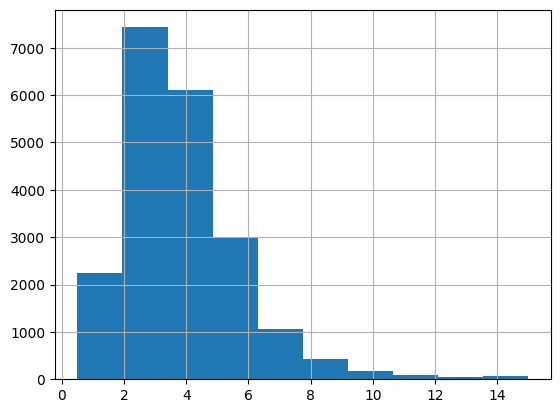

In [8]:
# Graficar el promedio de ingresos
df.median_income.hist()

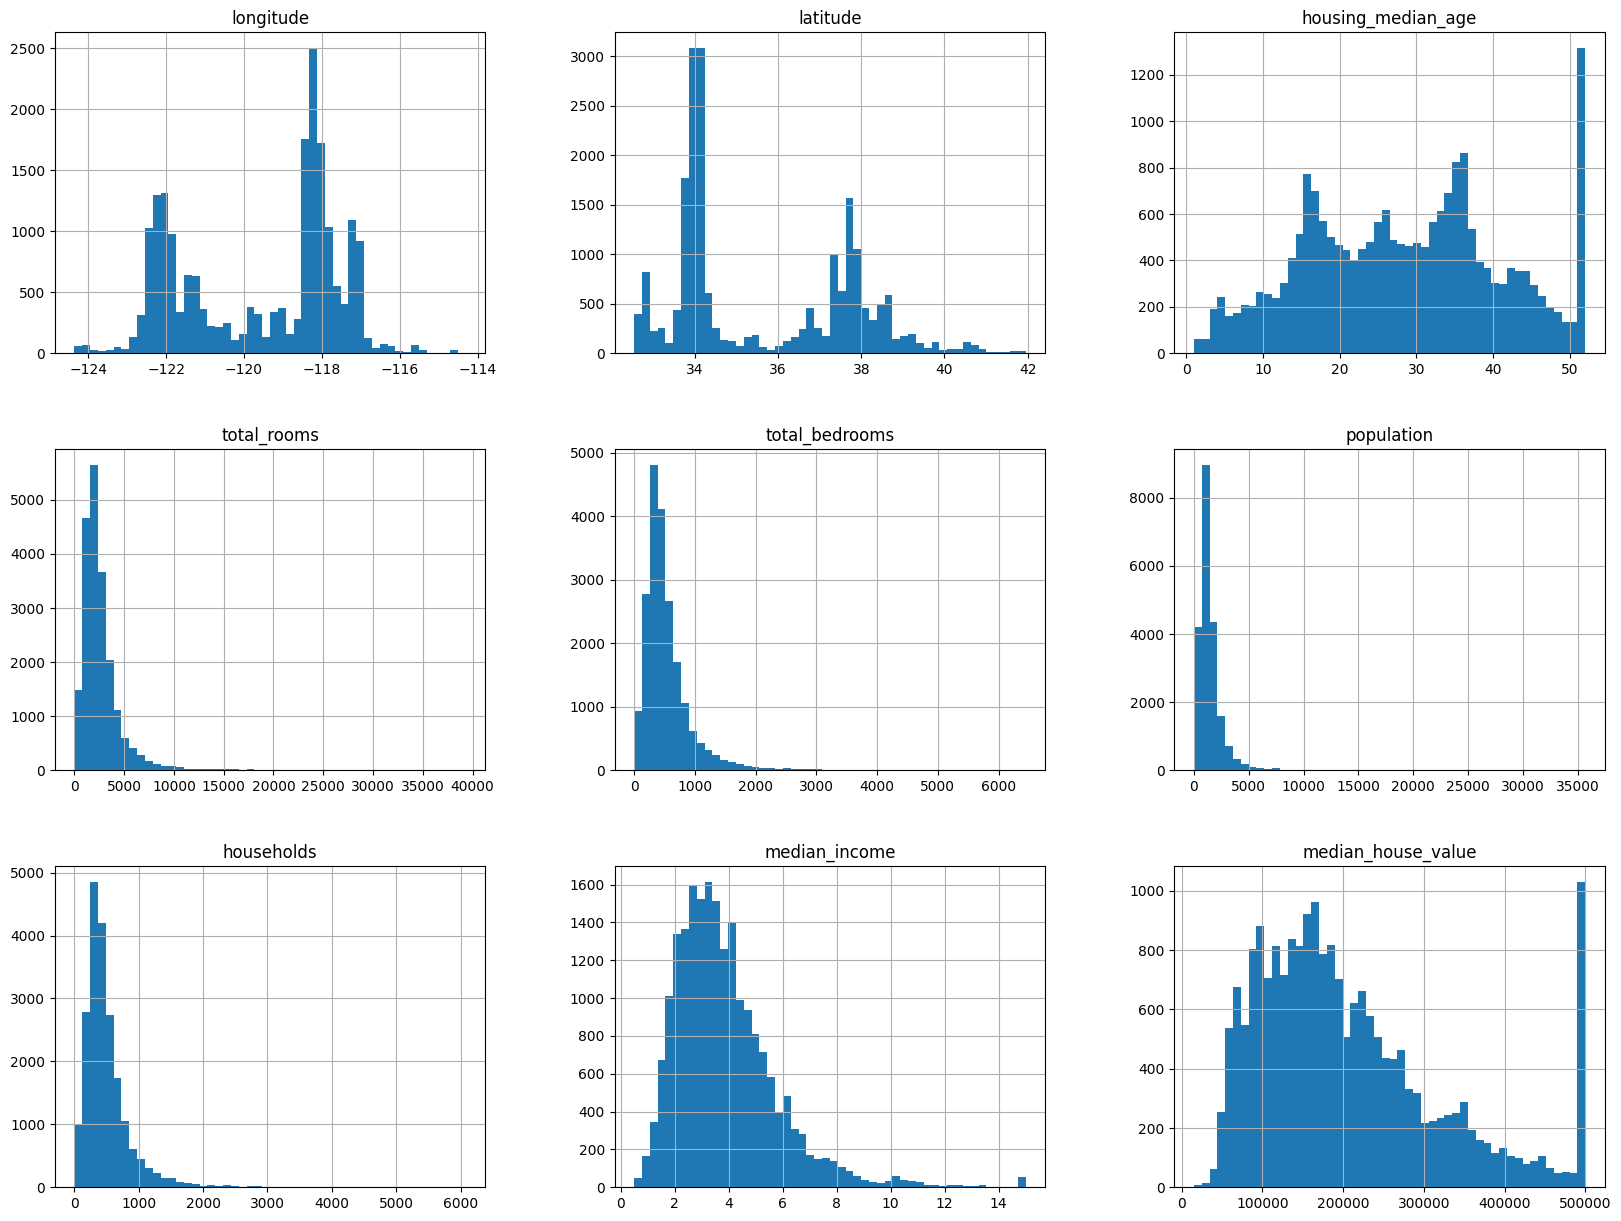

In [9]:
#Graficar todas las variables numericas 
df.hist(bins=50, figsize=(20, 15));

#### Mapa de California

<img src="figuras/CaliforniaMapa.png" align="middle" style="width:550px;" />

### Mapa de California (Sin Folium)

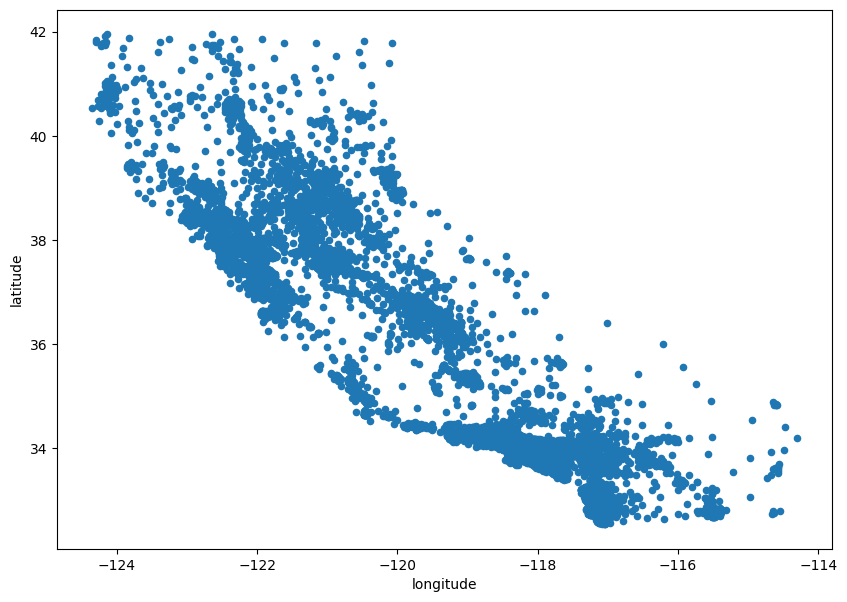

In [10]:
# Hacer una grafica de dispersión con la longitud en X y la latitud en Y.
df.plot.scatter(x='longitude',
                y='latitude',
                figsize=(10, 7));

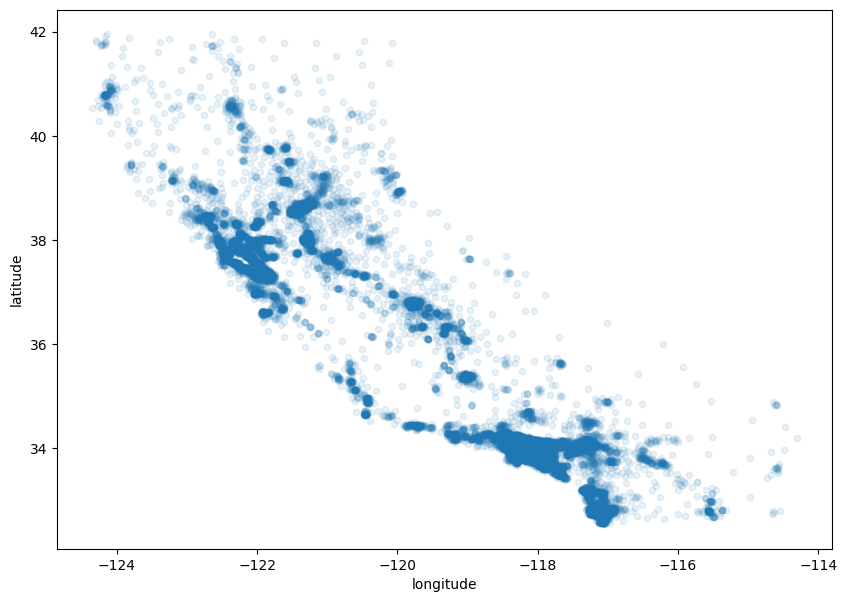

In [11]:
#Agregar alpha=0.1
df.plot.scatter(x='longitude',
                y='latitude',
                figsize=(10, 7),
                alpha=0.1);

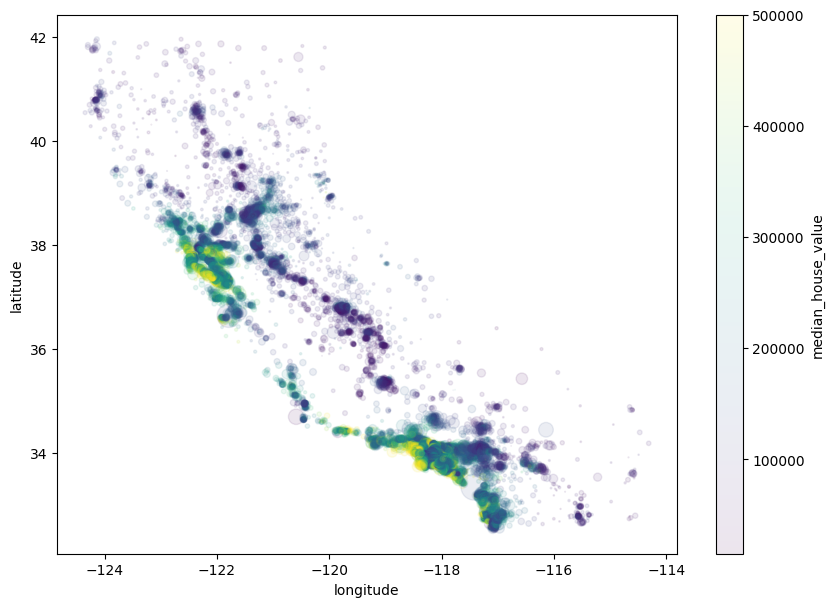

In [12]:
#Cambiar el tamaño del punto y agregar una escala de medición
#s : Tamaño de cada punto
#c : Etiqueta
df.plot.scatter(x='longitude', y='latitude', figsize=(10, 7),
                alpha=0.1, s=df.population / 100 ,
                c='median_house_value', colorbar=True);

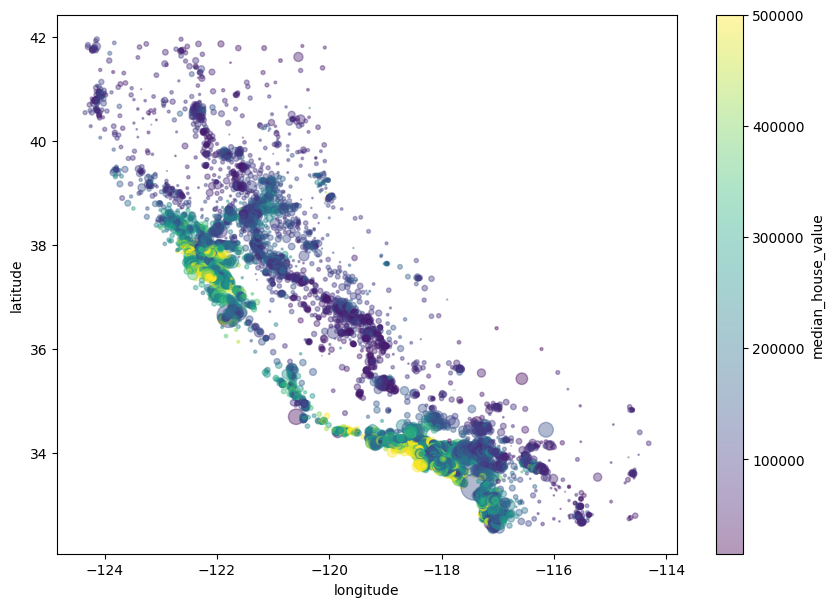

In [13]:
#pip install colorspacious
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
df.plot.scatter(x='longitude', y='latitude', figsize=(10, 7),
                alpha=0.4,
                s=df.population / 100,
                c='median_house_value',
                cmap=plt.get_cmap('jet'),
                colorbar=True);

### Mapa de California (Con Folium)

In [14]:
#pip install folium
import folium


In [15]:
#Hacer un arreglo llamado 'distritos_loc' que contenga solo la informacion de las coordenadas latitud y longitud


In [16]:
from folium import plugins
from folium.plugins import HeatMap



### Correlación de variables

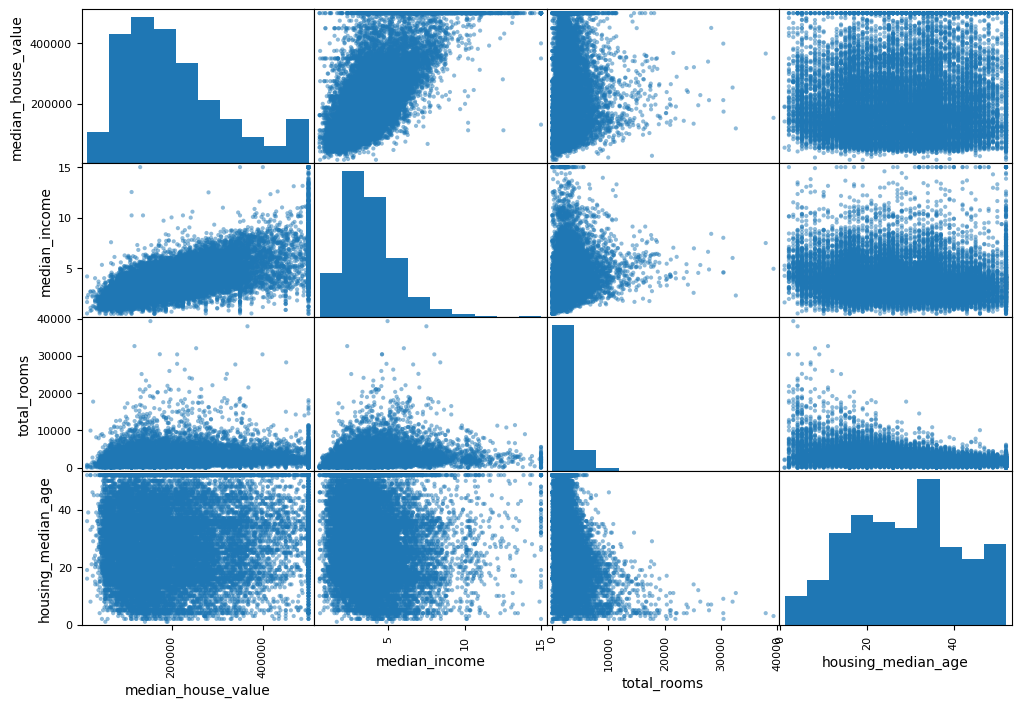

In [17]:
#Hacer diagramas de correlación
# Definir una lista llamada atributos  con las siguientes variables : 
# "median_house_value", "median_income", "total_rooms","housing_median_age"
from pandas.plotting import scatter_matrix

atributos = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(df[atributos], figsize=(12, 8));

In [18]:
# Definir una nueva columna llamada 'bed_rooms_per_room' y asignarle el valor de la division de
# la variables total_bedrooms con total_rooms
df['bed_rooms_per_room'] = df['total_bedrooms'] / df['total_rooms']


In [19]:
atributos=["median_house_value",
           "median_income",
           "bed_rooms_per_room",
           "total_rooms",
           "housing_median_age"]

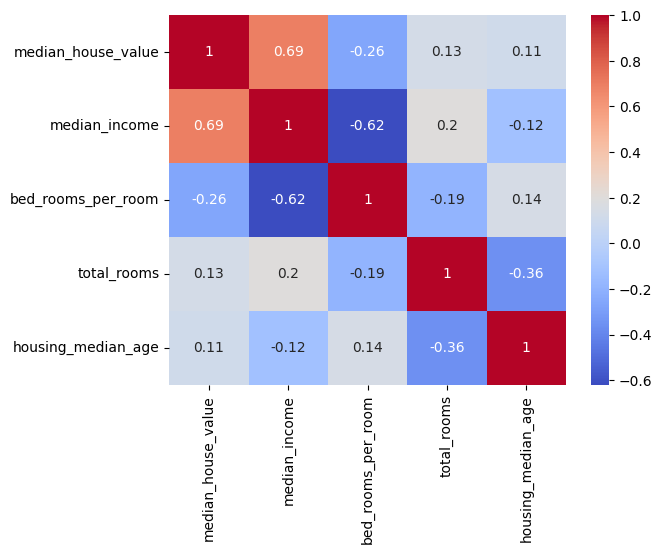

In [20]:
# Matriz correlación númerica y visual
#https://matplotlib.org/tutorials/colors/colormaps.html
#Instalación de seaborn
#pip install seaborn
import seaborn as sn

corrMatrix = df[atributos].corr().round(2)
sn.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.show ()

## 4. Prepare los datos y sus transformadores 

In [21]:
#Revisar si hay datos perdidos NaN
df.isnull().values.any()

True

In [22]:
#Número de filas
len(df)

20635

In [23]:
# eliminar datos  perdidos NaN
df = df.dropna ()
len(df)

20428

**Tipos de variables**

<img src="figuras/categarical_variables.jpg" align="middle" style="width:550px;" />

In [24]:
# Revisar nuevamente la columna 'ocean_proximity'
df.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
Name: ocean_proximity, dtype: int64

In [25]:
#Importamos la funcion OneHotEncoder
from sklearn.preprocessing import OneHotEncoder


In [26]:
## Ejemplo codificacion Ordinal
#from sklearn.preprocessing import OrdinalEncoder
#O_codificador = OrdinalEncoder()
#O_codificadir.fit_transform(df[["ocean_proximity"]])
#O_codificadir.categories_



###  ColumnTransformer  y pipeline

<img src="figuras/pipeline.jpg" align="middle" style="width:500px;" />

#### Pipeline

La función pipeline permite juntar varios trasformaciones secuenciales que se requieren ejecutar a un conjunto de datos.

**Pipeline(steps=[('titulo trasnformación1', trasnformación1), ('titulo trasnformación2', trasnformación2),...])**




In [27]:
#Modulos importantes
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [28]:
# Crear la lista de  viriables numericas y categoricas
# Númericas: 'median_income', 'total_rooms','housing_median_age','bed_rooms_per_room'
# Categoricas: 'ocean_proximity'



In [29]:
# Crear el pipeline de preprocesamiento para datos numéricos y categóricos.



#### ColumnTransformer


ColumnTransformer es una clase de scikit-learn que  permite aplicar transformaciones de preparación de datos de forma selectiva.

Por ejemplo,  permite aplicar una transformación específica o secuencia de transformaciones solo a las columnas numéricas, y una secuencia separada de transformaciones solo a las columnas categóricas.

Para usar ColumnTransformer, debe especificar una lista de transformadores.

Cada transformador es una tupla de tres elementos que define el nombre del transformador, la transformación a aplicar y los índices de columna a los que aplicar. Por ejemplo: **(Nombre, objeto, columnas)**

In [30]:
# Definir los transformadores


In [31]:
#Tener presente este orden numerico + categotico

### Preparando las muestras de entrenamiento y prueba

<img  align="middle" style="width:550px;" src="figuras/ml_diagrama3.jpg">


División general de los datos
* **X**: Datos  sin la columna "median_house_value""
* **y**: Datos con la columna "median_house_value"

Muestras de entrenamiento y prueba
* **X_train**: este será el grupo de entrenamiento
* **X_test**: este será el  grupo de prueba
* **y_train**: este será el target para el grupo de entrenamiento
* **y_test**: este será el target para el grupo de prueba


In [32]:
# Crear X (Quitar la columna o campo de "median_house_value")


In [33]:
# Crear y (Valor de de la columna "median_house_value")


In [34]:
# Dividir los datos para entrenamiento y prueba
from sklearn.model_selection import train_test_split


In [35]:
# Revise  el tamaño de cada muestra


## 5.  Seleccione algunos modelos y realice el entrenamiento (train).


In [36]:
# Llamamos al modelo lineal
from sklearn.linear_model import LinearRegression


In [37]:
# Pipeline de la predicción completa.


In [38]:
#Probamos en unas pocas instancias 


In [39]:
#Comparamos con los valores reales


#### Cross validation


from sklearn.model_selection import cross_val_score

La validación cruzada o  cross validation  (CV) es una de las técnicas utilizadas para probar la efectividad de los modelos de Machine Learning, también es un procedimiento de remuestreo utilizado para evaluar un modelo si tenemos datos limitados. 

Una manera de obtener las muestras es a traves del metodo del k-fold, el cual divide a los datos en k muestras como se muestra en la imagen (ejemplo con k=5) 

<img src="figuras/cross_validation.jpg" align="middle" style="width:550px;" />
   


In [40]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score
#https://github.com/scikit-learn/scikit-learn/issues/2439

#### Evaluación Linear Regression

In [41]:
# Evaluadar el modelo usando crossvalidation
#https://scikit-learn.org/stable/modules/model_evaluation.html


In [42]:
# Cambiamos el signo y sacamos la raiz


In [43]:
#Definimos una función que nos devuelva el score, mean y standard deviation


### DecisionTree

In [44]:
#Aplicar el modelo de arboles de decision con DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

#1. Nombrar una variable para nuestro modelo



In [45]:
#2. Definir el Pipeline : Transformación  + modelo



In [46]:

#3. Ajustar el modelo


In [47]:
#Evaluacion
# 4. Calcular el score con la validación cruzada CV=10


In [48]:

# 5. Realizar el cambio de signo y sacar la raiz


In [49]:

# 6. Mostrar el resultado usando la funcion display_scores


### RandomForest

In [50]:
#Aplicar el modelo RandomForestRegressor


In [51]:
#1. Nombrar una variable para nuestro modelo


In [52]:
#2. Definir el Pipeline : Transformación  + modelo


In [53]:
#3. Ajustar el modelo


In [54]:
#Evaluacion
# 4. Calcular el score con la validación cruzada CV=10


In [55]:
# 5. Realizar el cambio de signo y sacar la raiz


In [56]:
# 6. Mostrar el resultado usando la funcion display_scores


#### Resumen

| Modelo o clasificador   |  Mean | Standard deviation  |
|---|---|---|
|  Linear Regression  |    |       |
|   DecisionTree |    |        |
|  Random Forest   |   |         |


In [57]:
# Datos de evalación


In [58]:
# Agregamos una grafica para comparar visualmente los resultados


## 6 .  Afina(fine tune) el modelo RandomForest


In [59]:
# Utilizamos la función GridSearchCV para encontrar los valores optimos
from sklearn.model_selection import GridSearchCV


In [60]:
#Definición de posibles parametros
#n_estimators=[3, 10, 30,50 , 80,100]
#min_samples_split=[2,4,6,8]
#max_depth=[2,4,6,8,10]



In [61]:
#Definicion del grid de busqueda


In [62]:
# Ajuste del modelo usando todas las posibles combinaciones de parametros 


In [63]:
# Mostrar la mejor combinación


**Encontramos los nuevos valores de la media y desviación estándar**


In [64]:
#1 Ajustar el modelo con los nuevos parametros 


In [65]:
#2. Definir el Pipeline : Transformación  + modelo


In [66]:
#3. Ajustar el modelo


In [67]:
#Evaluacion
# 4. Calcular el score con la validación cruzada CV=10


In [68]:
# 5. Realizar el cambio de signo y sacar la raiz



In [69]:
# 6. Mostrar el resultado usando la funcion display_scores


#### Extra 1 : Random grid

In [70]:
#Definición de posibles parametros
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 30, num = 3)]
min_samples_split = [2,3,4,5,6 ]
min_samples_leaf = [1, 2, 3,4,5,6 ]

params_grid = {'forest_reg__n_estimators': n_estimators,
               'forest_reg__max_features': max_features,
               'forest_reg__max_depth': max_depth,
               'forest_reg__min_samples_split': min_samples_split,
               'forest_reg__min_samples_leaf': min_samples_leaf
              }

print(params_grid)

{'forest_reg__n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'forest_reg__max_features': ['auto', 'sqrt'], 'forest_reg__max_depth': [3, 16, 30], 'forest_reg__min_samples_split': [2, 3, 4, 5, 6], 'forest_reg__min_samples_leaf': [1, 2, 3, 4, 5, 6]}


In [71]:
#Modulo RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

gridRandom_forest= RandomizedSearchCV(estimator = model_forest_reg, 
                               param_distributions = params_grid, n_iter = 5, cv = 10,
                               random_state=42,n_jobs = -1,verbose=10)

NameError: name 'model_forest_reg' is not defined

In [ ]:
# Ajuste del modelo usando aleatoriamente algunas iteraciones
gridRandom_forest.fit(X, y)

In [ ]:
# Mejores parametros encontrados
gridRandom_forest.best_params_

#### Extra 2: Ranking de parámetros

In [ ]:
#Puntaje de las variables
ranking= (grid.best_estimator_.named_steps["forest_reg"].feature_importances_).tolist()
ranking

In [ ]:
sum(ranking)

In [ ]:
numeric_list

In [ ]:
categorical_list_ocean_proximity = Nominal_codificador.categories_[0].tolist()
categorical_list_ocean_proximity 

In [ ]:
list_atributos=numeric_list+categorical_list_ocean_proximity
list_atributos

In [ ]:
[(ranking[i], list_atributos[i])  for i in range(len(ranking))]

### Análisis final 

In [ ]:
# Datos de evaluación


In [ ]:
# Agregamos una grafica para comparar visualmente los resultados
